### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

In [2]:
%matplotlib inline

In [3]:
from funcs import get_canvas
from funcs import matplotlib_imshow

In [4]:
# the transform function is used to apply some scaling, rotation and translation to an image randomly
from transform import transform

### Finding and drawing contours (from an image)

In [5]:
img = cv.bitwise_not(cv.imread("./imgs/sword.jpeg", 0))

In [6]:
def find_contours(img):
    thresh_val, thresh_img = cv.threshold(img, 120, 255, cv.THRESH_BINARY)
    cnt, hier = cv.findContours(thresh_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    return cnt

- Normal Image (Without any Translation, Scaling or, Rotation Applied)

In [7]:
cnt = find_contours(img)[0]

In [8]:
canvas_shape = tuple(int(1.5 * i) for i in img.shape)

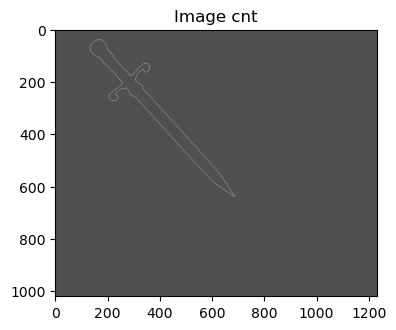

In [9]:
# drawing the contour
canvas = get_canvas(canvas_shape, (80))
matplotlib_imshow("Image cnt", cv.drawContours(canvas, cnt, -1, (255, 255), 1), 5)

- Image with Translation Applied

In [10]:
# applying translation
translated_img_cnt, translated_img_title = transform(img, translate_img=True)

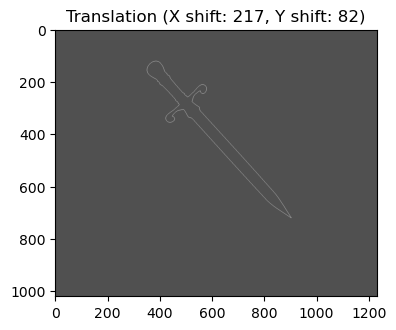

In [11]:
# drawing the contour
canvas = get_canvas(canvas_shape, (80))
matplotlib_imshow(
    translated_img_title,
    cv.drawContours(canvas, translated_img_cnt, -1, (255, 255), 1),
    5,
)

- Image with Scaling Applied

In [12]:
# applying scaling
scaled_img_cnt, scaled_img_title = transform(img, scale_img=True)

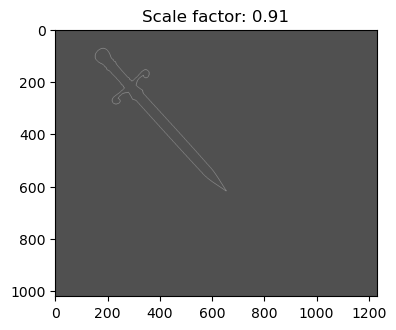

In [13]:
# drawing the contour
canvas = get_canvas(canvas_shape, (80))
matplotlib_imshow(
    scaled_img_title,
    cv.drawContours(canvas, scaled_img_cnt, -1, (255, 255), 1),
    5,
)

- Image with Rotation Applied

In [14]:
# applying rotation
rotated_img_cnt, rotated_img_title = transform(img, rotate_img=True)

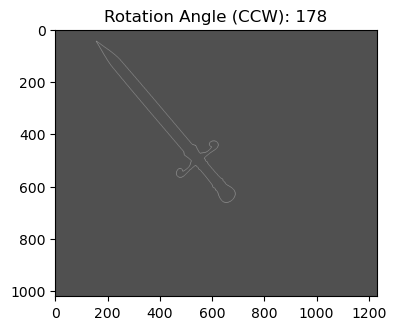

In [15]:
# drawing the contour
canvas = get_canvas(canvas_shape, (80))
matplotlib_imshow(
    rotated_img_title,
    cv.drawContours(canvas, rotated_img_cnt, -1, (255, 255), 1),
    5,
)

- Image with Translation and Scaling Applied

In [16]:
# applying translation and scaling
translated_and_scaled_img_cnt, translated_and_scaled_img_title = transform(
    img, translate_and_scale_img=True
)

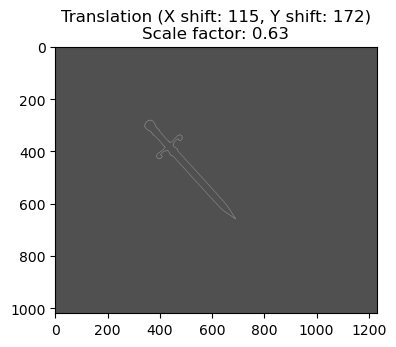

In [17]:
# drawing the contour
canvas = get_canvas(canvas_shape, (80))
matplotlib_imshow(
    translated_and_scaled_img_title,
    cv.drawContours(canvas, translated_and_scaled_img_cnt, -1, (255, 255), 1),
    5,
)

- Image with Translation and Rotation Applied

In [18]:
# applying translation and rotation
translated_and_rotated_img_cnt, translated_and_rotated_img_title = transform(
    img, translate_and_rotate_img=True
)

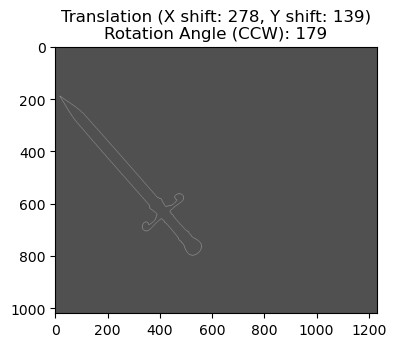

In [19]:
# drawing the contour
canvas = get_canvas(canvas_shape, (80))
matplotlib_imshow(
    translated_and_rotated_img_title,
    cv.drawContours(canvas, translated_and_rotated_img_cnt, -1, (255, 255), 1),
    5,
)

- Image with Translation, Scaling and Rotation Applied

In [20]:
# applying translation, scaling and rotation
(
    translated_scaled_and_rotated_img_cnt,
    translated_scaled_and_rotated_img_title,
) = transform(img, translate_scale_and_rotate_img=True)

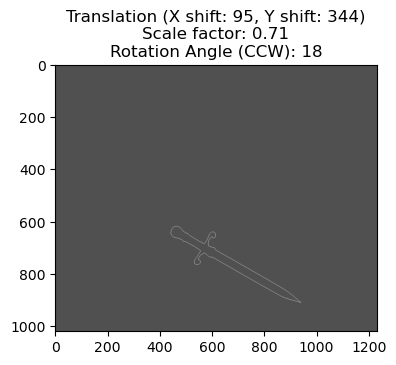

In [21]:
# drawing the contour
canvas = get_canvas(canvas_shape, (80))
matplotlib_imshow(
    translated_scaled_and_rotated_img_title,
    cv.drawContours(canvas, translated_scaled_and_rotated_img_cnt, -1, (255, 255), 1),
    5,
)

## Some Important Contour Properties ([Docs](https://docs.opencv.org/4.7.0/d1/d32/tutorial_py_contour_properties.html))

**Primary Resource:** Read This [Blog Post](https://bleedaiacademy.com/contour-detection-101-contour-analysis-pt3/).

Analyzing the detected contour for its properties, enables us to build applications capable of detecting and identifying objects in an image.

There are some contour properties which are invariant to different transformations such as rotation, translation, and scaling. 

Also, there are seven unique image moments called **Hu-moments** which are really helpful for object detection using contours since they are invariant to translation, scaling, rotation, and reflection all at once.

### Aspect Ratio

- Aspect ratio is the ratio of width to height of the bounding rectangle of an object.

<img src="./imgs/aspect_ratio.png">

- Aspect ratio is invariant to translation.

In [18]:
# Before Translation is Applied
x, y, w, h = cv.boundingRect(cnt)
aspect_ratio = w / h

# After Translation is Applied
x, y, w, h = cv.boundingRect(translated_img_cnt)
aspect_ratio_translate = w / h


print("Aspect Ratio (Before Translation is Applied): ", aspect_ratio)
print("Aspect Ratio (After Translation is Applied): ", aspect_ratio_translate)

Aspect Ratio (Before Translation is Applied):  0.92
Aspect Ratio (After Translation is Applied):  0.92


**`Decision: `** Aspect Ratio is Translation Invariant.

### Extent

- Extent of a contour is the ratio of contour area to its bounding rectangle area.

<img src="./imgs/extent.png">

- Extent is invariant to both translation and scaling.

In [28]:
# object area or, contour area
def cnt_area(cnt):
    return cv.contourArea(cnt)


# bounding rectangle area
def rect_area(cnt):
    x, y, w, h = cv.boundingRect(cnt)
    rect_area = w * h
    return rect_area

In [30]:
# extent before translation and scaling
extent = cnt_area(cnt) / rect_area(cnt)
print(f"Before Translation or/and Scaling is Applied, Extent = {round(extent, 3)}")

# extent after only translation is applied
extent_translate = cnt_area(translated_img_cnt) / rect_area(translated_img_cnt)
print(f"After only Translation is Applied, Extent = {round(extent_translate, 3)}")

# extent after only scaling is applied
extent_scale = cnt_area(scaled_img_cnt) / rect_area(scaled_img_cnt)
print(f"After only Scaling is Applied, Extent = {round(extent_scale, 3)}")

# extent after translation and scaling is applied
extent_translate_scale = cnt_area(translated_and_scaled_img_cnt) / rect_area(
    translated_and_scaled_img_cnt
)
print(
    f"After Both Translation and Scaling is Applied, Extent = {round(extent_translate_scale, 3)}"
)

Before Translation or/and Scaling is Applied, Extent = 0.108
After only Translation is Applied, Extent = 0.108
After only Scaling is Applied, Extent = 0.108
After Both Translation and Scaling is Applied, Extent = 0.106


**`Decision: `** Extent is both Translation and Scaling Invariant.

### Equivalent Diameter

- Equivalent Diameter is the diameter of the circle whose area is the same as the contour area. 

<img src="./imgs/equivalent_dia.png">

- Equivalent Diameter is invariant to both translation and rotation.

In [32]:
import math

In [35]:
def equi_dia(contour_area):
    return math.sqrt(4 * contour_area / math.pi)

In [36]:
# equivalent diameter before translation or, scaling
equi_dia_cnt = equi_dia(cv.contourArea(cnt))
print(
    f"Before Translation or/and Scaling is Applied, Equivalent Dia = {round(equi_dia_cnt, 3)}"
)

# equivalent diameter after only translation is applied
equi_dia_translate = equi_dia(cv.contourArea(translated_img_cnt))
print(f"After Translation is Applied, Equivalent Dia = {round(equi_dia_translate, 3)}")

# equivalent diameter after only rotation is applied
equi_dia_rotate = equi_dia(cv.contourArea(rotated_img_cnt))
print(f"After Rotation is Applied, Equivalent Dia = {round(equi_dia_rotate, 3)}")

# equivalent diameter after both translation and rotation is applied
equi_dia_translate_rotate = equi_dia(cv.contourArea(translated_and_rotated_img_cnt))
print(
    f"After Both Translation and, Rotation is Applied, Equivalent Dia = {round(equi_dia_translate_rotate, 3)}"
)

Before Translation or/and Scaling is Applied, Equivalent Dia = 213.138
After Translation is Applied, Equivalent Dia = 213.138
After Rotation is Applied, Equivalent Dia = 213.192
After Both Translation and, Rotation is Applied, Equivalent Dia = 213.241


**`Decision: `** Equivalent diameter is both Translation and Rotation Invariant.